## Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

* In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable.
* In the next cell, add the following code that we used to generate the random latitudes.
* We'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

## Let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities

* With our list of random latitudes and longitudes, we'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module.

In [4]:
!pip install citipy

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


621

# 6.2.1 Understanding APIs

# 6.2.2 Get Started with OpenWeatherMap API

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5b080f7f22dbf268c1c5ab4257892315&q=Boston


## The JavaScript Object Notation Format for API Data

* When we retrieve data from a website, we have to make a "request," which returns data in a text format, not in a tab- or comma-separated file.
* One format we can use to parse data is JavaScript Object Notation (JSON).
* The JSON format is also referred to as an "object" or "JSON object."
* The data inside a JSON object opens and closes with curly braces, much like a Python dictionary.
* Inside the JSON object is a collection of dictionaries and arrays.

## The Python Requests Library


* To request JSON data over the internet, we use the Requests Library in Python.
* The Anaconda installation comes with version 2.22 of the Requests Library.

In [10]:
import requests
requests.__version__

'2.26.0'

# 6.2.5 Parse a Response from an API
Before we collect weather data from more than 500 cities, we'll walk through how to get the weather data from Boston.

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 6.94,
  'feels_like': -2.61,
  'temp_min': -0.36,
  'temp_max': 14.95,
  'pressure': 1022,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 5.19, 'deg': 271, 'gust': 11.43},
 'clouds': {'all': 12},
 'dt': 1643609070,
 'sys': {'type': 2,
  'id': 2039376,
  'country': 'US',
  'sunrise': 1643630333,
  'sunset': 1643666182},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

### 1. In a new cell, let's assign a variable to the city_weather.json() data to the variable "boston_data" and run the cell.

In [12]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 6.94,
  'feels_like': -2.61,
  'temp_min': -0.36,
  'temp_max': 14.95,
  'pressure': 1022,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 5.19, 'deg': 271, 'gust': 11.43},
 'clouds': {'all': 12},
 'dt': 1643609070,
 'sys': {'type': 2,
  'id': 2039376,
  'country': 'US',
  'sunrise': 1643630333,
  'sunset': 1643666182},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

## 2. Next, using the sys key to get the corresponding value, we type boston_data['sys'] in a new cell and run the cell. The output is another dictionary as shown in the following image.

In [13]:
boston_data["sys"]

{'type': 2,
 'id': 2039376,
 'country': 'US',
 'sunrise': 1643630333,
 'sunset': 1643666182}

## 3. If we add the country key in brackets after the sys key, and run the cell again, ‘US’ will be returned in the output.

In [14]:
boston_data["sys"]["country"]

'US'

If we want to retrieve the date in the weather data, we would add the dt key to the boston_data variable like this: boston_data["dt"].

In [15]:
boston_data["dt"]

1643609070

* Using similar syntax to get the time of day, we can get the latitude, longitude, maximum temperature, humidity, percent cloudiness, and wind speed.

Add the following code to a new cell and run the cell.

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 14.95 77 12 5.19


## Convert the Date Timestamp

*If we want to convert the timestamp to the International Organization for Standardization (ISO) format, or YYYY-MM-DD-HH-MM-SS, we need to use the Python datetime module.

Let's convert the date from the Boston weather data in the JSON format to the ISO format.

In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 1, 31, 6, 4, 30)

We can convert this datetime format to 2019-10-21 17:24:35 using the Python string format method strftime() and adding how we want the string to look inside the parentheses

In [18]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-31 06:04:30'

# 6.2.6 Get the City Weather Data

## Import Dependencies, and Initialize an Empty List and Counters

* At the top of our code block, we are going to declare an empty list, city_data = []; add a print statement that references the beginning of the logging; and create counters for the record numbers, 1–50; and the set counter.

We will now work in our WeatherPy.ipynb file. Before continuing, make sure the following tasks are completed:

* Import your Requests Library and the weather_api_key.
* Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
* Also, import the time library, as well as the datetime module using the following code:

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

Next, add the following code to a new cell, but don't run the cell. Instead, continue to add on to this code block.


In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | udachnyy
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 11 of Set 1 | makakilo city
Processing Record 12 of Set 1 | kilindoni
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | egvekinot
Processing Record 15 of Set 1 | shangqiu
Processing Record 16 of Set 1 | georgiyevka
Processing Record 17 of Set 1 | vao
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | kastornoye
Processing

Processing Record 37 of Set 4 | meadow lake
Processing Record 38 of Set 4 | bubaque
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | esperance
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | stranda
Processing Record 44 of Set 4 | sarmanovo
Processing Record 45 of Set 4 | san rafael
Processing Record 46 of Set 4 | lazaro cardenas
Processing Record 47 of Set 4 | klyuchi
Processing Record 48 of Set 4 | bima
Processing Record 49 of Set 4 | port lavaca
Processing Record 50 of Set 4 | pacific grove
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | chiang klang
Processing Record 4 of Set 5 | san vicente
Processing Record 5 of Set 5 | buala
Processing Record 6 of Set 5 | kahului
Processing Record 7 of Set 5 | humberto de campos
Processing Record 8 of Set 5 | georgetown
Processing Record 9 of Set 5 | amderma
City not fou

Processing Record 30 of Set 8 | naze
Processing Record 31 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 32 of Set 8 | jiexiu
Processing Record 33 of Set 8 | marolambo
Processing Record 34 of Set 8 | pijao
Processing Record 35 of Set 8 | knysna
Processing Record 36 of Set 8 | melo
Processing Record 37 of Set 8 | nuevitas
Processing Record 38 of Set 8 | athabasca
Processing Record 39 of Set 8 | coahuayana
Processing Record 40 of Set 8 | panacan
Processing Record 41 of Set 8 | nome
Processing Record 42 of Set 8 | ayan
Processing Record 43 of Set 8 | yaan
Processing Record 44 of Set 8 | hasaki
Processing Record 45 of Set 8 | lagoa
Processing Record 46 of Set 8 | tuatapere
Processing Record 47 of Set 8 | san policarpo
Processing Record 48 of Set 8 | praya
Processing Record 49 of Set 8 | canico
Processing Record 50 of Set 8 | saint-francois
Processing Record 1 of Set 9 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 9 | kaeo
Processing Record 3 of Se

Processing Record 18 of Set 12 | vilcun
Processing Record 19 of Set 12 | kimbe
Processing Record 20 of Set 12 | alotau
City not found. Skipping...
Processing Record 21 of Set 12 | nanakuli
Processing Record 22 of Set 12 | san carlos
Processing Record 23 of Set 12 | nacala
Processing Record 24 of Set 12 | viligili
City not found. Skipping...
Processing Record 25 of Set 12 | basco
Processing Record 26 of Set 12 | ginir
Processing Record 27 of Set 12 | hovd
Processing Record 28 of Set 12 | fairbanks
Processing Record 29 of Set 12 | omsukchan
Processing Record 30 of Set 12 | storm lake
Processing Record 31 of Set 12 | mananara
Processing Record 32 of Set 12 | goba
Processing Record 33 of Set 12 | bergen
Processing Record 34 of Set 12 | dali
Processing Record 35 of Set 12 | lewiston
Processing Record 36 of Set 12 | portland
Processing Record 37 of Set 12 | sistranda
Processing Record 38 of Set 12 | puri
Processing Record 39 of Set 12 | cabedelo
Processing Record 40 of Set 12 | tilichiki
Pro

In [25]:
len(city_data)

575

# 6.2.7 Create a DataFrame of City Weather Data

### Convert the array of dictionaries to a Pandas DataFrame

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,60.87,67,99,7.00,AR,2022-01-31 06:09:29
1,Rikitea,-23.1203,-134.9692,77.27,63,100,5.53,PF,2022-01-31 06:04:40
2,Vardo,70.3705,31.1107,21.40,74,55,15.43,NO,2022-01-31 06:09:30
3,Saint-Philippe,-21.3585,55.7679,85.55,83,86,13.85,RE,2022-01-31 06:09:30
4,Udachnyy,66.4167,112.4000,-25.89,99,74,3.09,RU,2022-01-31 06:09:31
5,Hobart,-42.8794,147.3294,84.27,58,20,1.01,AU,2022-01-31 06:09:31
6,Bluff,-46.6000,168.3333,62.31,86,97,3.71,NZ,2022-01-31 06:09:32
7,Mataura,-46.1927,168.8643,72.48,60,94,3.98,NZ,2022-01-31 06:04:54
8,Makakilo City,21.3469,-158.0858,72.68,71,40,3.44,US,2022-01-31 06:09:33
9,Kilindoni,-7.9139,39.6668,81.41,76,52,8.75,TZ,2022-01-31 06:09:33


### Reorder columns in the DataFrame

In [31]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness",
                            "Wind Speed"]]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-01-31 06:09:29,-38.0023,-57.5575,60.87,67,99,7.00
1,Rikitea,PF,2022-01-31 06:04:40,-23.1203,-134.9692,77.27,63,100,5.53
2,Vardo,NO,2022-01-31 06:09:30,70.3705,31.1107,21.40,74,55,15.43
3,Saint-Philippe,RE,2022-01-31 06:09:30,-21.3585,55.7679,85.55,83,86,13.85
4,Udachnyy,RU,2022-01-31 06:09:31,66.4167,112.4000,-25.89,99,74,3.09


### Create an output file to save the DataFrame as a CSV in a new folder for that file

In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

Retrieve the data we need to create our scatter plots. We will need latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

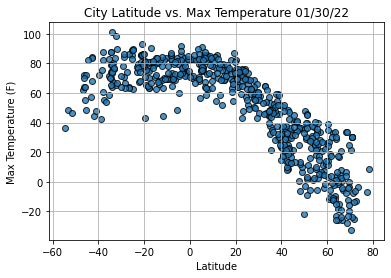

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

In addition to changing the y-axis variable to "humidity," we need to change the title to "Humidity," and the y-axis label to "Humidity (%)."

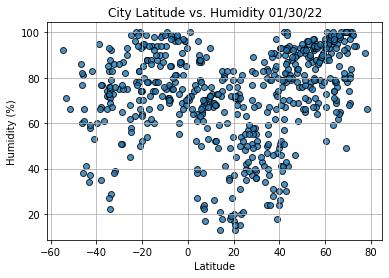

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."

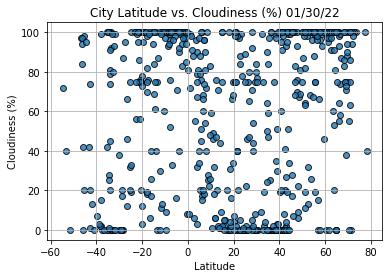

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

Let's repurpose the code we have been using and change the y-axis variable to "wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."

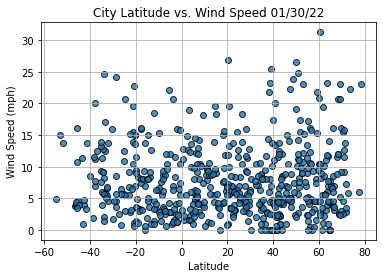

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.1 Use Linear Regression to Find the Relationship Between Variables

Practice Using Linear Regression...random_number file

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.

## Create a Linear Regression Function

In our function, we have four parameters: x_values, y_values, y_label, and text_coordinates, and we will add a fifth parameter for the title, called, title. Now, add the algorithm we use to perform the linear regression underneath the function. Our function should look like the following.

In [207]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates,):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Create the Hemisphere DataFrames

We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres.

To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].

Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. Note that you may see a different city in your output cell than the one shown in the following image.


In [208]:
index13 = city_data_df.loc[13]
index13

City                  Georgiyevka
Country                        KZ
Date          2022-01-31 06:06:12
Lat                       43.0369
Lng                       74.7114
Max Temp                    24.84
Humidity                       93
Cloudiness                    100
Wind Speed                   2.24
Name: 13, dtype: object

We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these criteria.

In [209]:
city_data_df["Lat"]>=0

0      False
1      False
2       True
3      False
4       True
       ...  
570    False
571     True
572     True
573    False
574     True
Name: Lat, Length: 575, dtype: bool

If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.

* We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.

To create DataFrames for the Northern and Southern Hemispheres' data, add the code to a new cell and run the code.

In [210]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.

Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

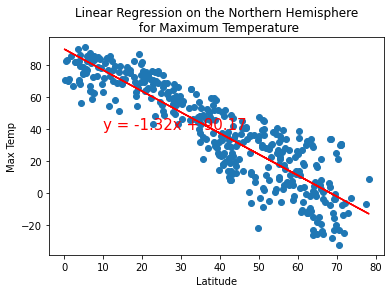

In [211]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))
                       

## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

To generate the linear regression on the maximum temperature for the Southern Hemisphere, reuse the code for the Northern Hemisphere and replace the northern_hemi_df DataFrame with the southern_hemi_df DataFrame to get the x- and y-values.

Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

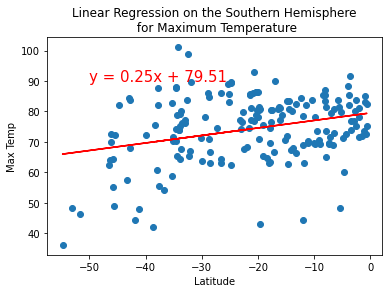

In [212]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

Using the plot_linear_regression function, we can generate the regression lines on the percent humidity for the Northern and Southern Hemispheres.



To perform the linear regression on the percent humidity for the Northern Hemisphere, set the x-value equal to the latitude column and y-value equal to the Humidity column from the northern_hemi_df DataFrame.

Call the plot_linear_regression function

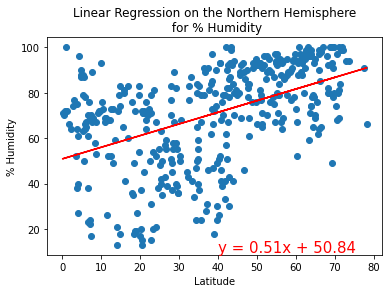

In [213]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))
                        

## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

For our linear regression line and plot of the percent humidity and latitudes for the Southern Hemisphere, set the x-value equal to the latitude column and y-value equal to the humidity column from the southern_hemi_df DataFrame.

Call the plot_linear_regression function, with the x-and y-values, and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

Add the code to a new cell and run it to generate the linear regression and plot the data.

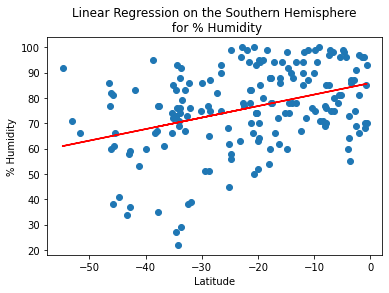

In [217]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

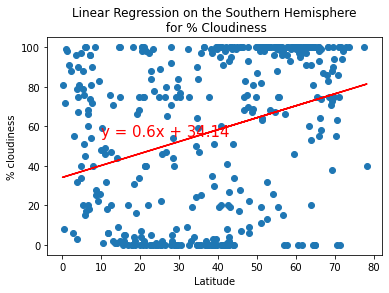

In [215]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% cloudiness',(10,55))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

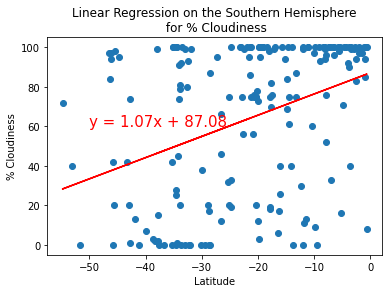

In [216]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))
                        

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere


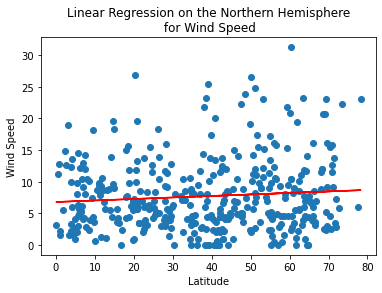

In [219]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,35))
                        

## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

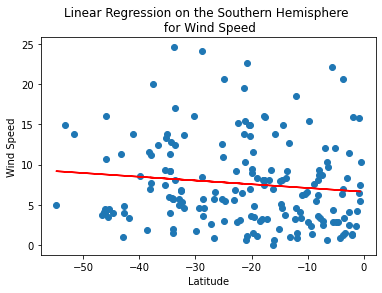

In [225]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
                   